# K-Means Clustering




## Name: Ankit Dimri
## Roll No.: 17BCS004
### Data: OldFaithfulData

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

In [2]:
# Imports dataset
df = pd.read_csv ("~/ankit/Github/Machine-Learning/dataset/OldFaithfulData.csv")
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


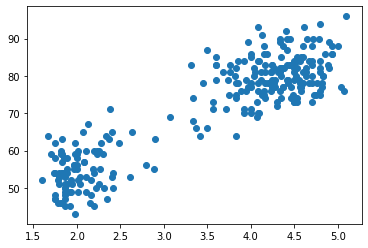

In [17]:
# Plotting the original data
plt.scatter (df ["eruptions"], df ["waiting"])

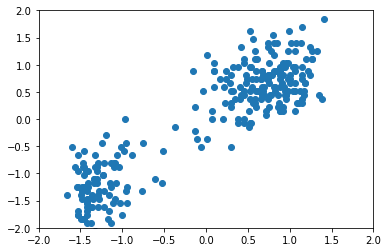

In [24]:
# Standardizing the data using library sklearn for comparison
scaler = StandardScaler() 
data_scaled = pd.DataFrame (scaler.fit_transform(df))
plt.xlim ((-2, 2))
plt.ylim ((-2, 2))
plt.scatter (data_scaled [0], data_scaled [1])

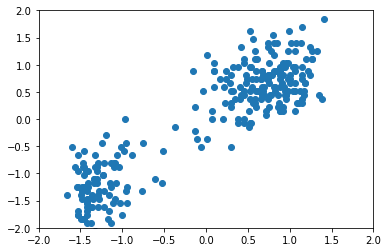

In [25]:
# Standardizing the data using formulae which will be used for K means clustering
df_norm = (df - np.mean (df))
df_norm ["eruptions"] = df_norm ["eruptions"] / np.std (df_norm ["eruptions"])
df_norm ["waiting"] = df_norm ["waiting"] / np.std (df_norm ["waiting"])
plt.xlim ((-2, 2))
plt.ylim ((-2, 2))
plt.scatter (df_norm ["eruptions"], df_norm ["waiting"])

In [6]:
# To compute Eulerian distance between the two points
def distance (p1, p2):
    return np.sqrt ((p1 [0] - p2 [0])**2 + ((p1 [1] - p2 [1])**2))

In [26]:
# Functions for K means clustering
def Kmeans (k, df_norm):
    
    # Initialize random initial means
    mu = np.random.randint (-2, 2, size = (k, 2))
    # Cost function
    J = []
    
    # make clusters
    clusters = list ()
    for i in range (k):
        clusters.append ([])
    # Making clusters using the first random initial means
    for i in range (len (df_norm.values)):
        min = distance (df_norm.values [i], mu [0])
        clus = 0
        for j in range (1, k):
            if min > distance (df_norm.values [i], mu [j]):
                min = distance (df_norm.values [i], mu [j])
                clus = j

        clusters [clus].append (df_norm.values [i])

    colors = ['red', 'blue']
    col = 0
    for i in range (len (clusters)):
        for j in range (len (clusters [i])):
            plt.scatter (clusters [i] [j] [0], clusters [i] [j] [1], color = colors [col])
        col = col + 1

    for i in range (k):
        plt.plot (mu [i] [0], mu [i] [1], 'g.', color = 'green', markersize = 25)

    plt.xlim ((-2, 2))
    plt.ylim ((-2, 2))
    plt.show ()
    
    # Compute cost
    cost = 0
    for i in range (k):
        for j in range (len (clusters [i])):
            cost += distance (clusters [i] [j], mu [i]) 
    J.append (cost)

    # Compare the new and old means
    new_mu = []
    for i in range (k):
        new_mu.append ([np.mean (pd.DataFrame (clusters [i])) [0], np.mean (pd.DataFrame (clusters [i])) [1]])

    flag = 0
    for i in range (k):
        if new_mu [i] [0] != mu [i] [0] or new_mu [i] [1] != mu [i] [1]:
            flag = 1
            break
    mu = new_mu

    # Run while the old mean is not equal to the new computed mean
    while flag:

        clusters = list ()
        for i in range (k):
            clusters.append ([])
        for i in range (len (df_norm.values)):
            min = distance (df_norm.values [i], mu [0])
            clus = 0
            for j in range (1, k):
                if min > distance (df_norm.values [i], mu [j]):
                    min = distance (df_norm.values [i], mu [j])
                    clus = j

            clusters [clus].append (df_norm.values [i])

        colors = ['red', 'blue']
        col = 0
        for i in range (len (clusters)):
            for j in range (len (clusters [i])):
                plt.scatter (clusters [i] [j] [0], clusters [i] [j] [1], color = colors [col])
            col = col + 1

        for i in range (k):
            plt.plot (mu [i] [0], mu [i] [1], 'g.', color = 'green', markersize = 25)

        plt.xlim ((-2, 2))
        plt.ylim ((-2, 2))
        plt.show ()
        cost = 0
        for i in range (k):
            for j in range (len (clusters [i])):
                cost += distance (clusters [i] [j], mu [i]) 
        J.append (cost)

        new_mu = []
        for i in range (k):
            new_mu.append ([np.mean (pd.DataFrame (clusters [i])) [0], np.mean (pd.DataFrame (clusters [i])) [1]])
        flag = 0
        for i in range (k):
            if new_mu [i] [0] != mu [i] [0] or new_mu [i] [1] != mu [i] [1]:
                flag = 1
                break
        mu = new_mu
    
    # Plot cost function
    plt.plot ([i for i in range (len (J))], J)

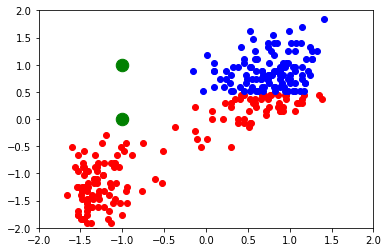

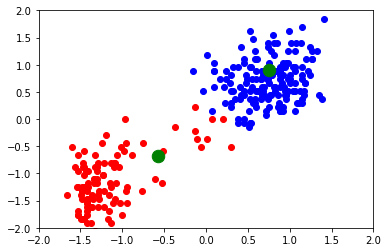

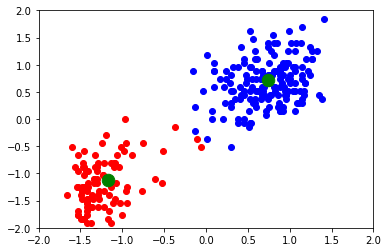

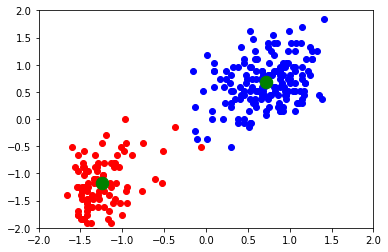

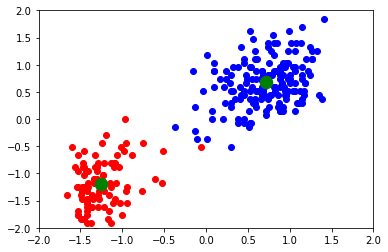

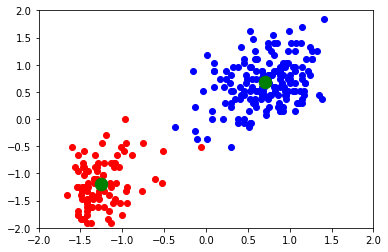

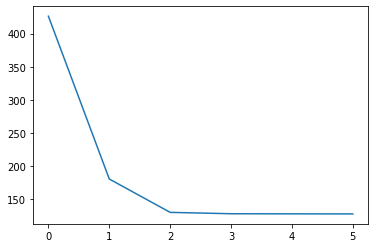

In [28]:
Kmeans (k = 2, df_norm = df_norm) # Do K means clustering for the data